In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw
from matplotlib.ticker import MaxNLocator

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import toolbox

# Simulation 60 m

In [2]:
sim_60 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_60m_t3650_diff-False.nc')
sim_60 = toolbox.stuck_particles_mask(sim_60)

In [3]:
sim_60

<xarray.Dataset>
Dimensions:           (traj: 50000, obs: 3651)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 5e+04 5e+04 5e+04
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2010...
    lat               (traj, obs) float64 -32.16 -32.23 -32.33 ... 11.9 11.97
    lon               (traj, obs) float64 6.276 6.623 6.957 ... 87.4 87.47 87.55
    z                 (traj, obs) float64 60.0 60.12 60.88 ... 457.3 457.8 458.6
    cons_temperature  (traj, obs) float32 18.33 18.42 17.81 ... 10.4 10.4 10.41
    abs_salinity      (traj, obs) float32 35.63 35.64 35.57 ... 35.06 35.06
    mld               (traj, obs) float32 30.64 44.68 47.69 ... 43.52 36.59
    alpha             (traj, obs) float32 1e-06 1e-06 1e-06 ... 1e-06 1e-06
    density           (traj, obs) float32 1.035e+03 1.026e+03 ... 1.027e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

In [ ]:
max_sal, min_sal = sim_60['abs_salinity'].max(), sim_60['abs_salinity'].min()
max_temp, min_temp = sim_60['cons_temperature'].max(), sim_60['cons_temperature'].min()

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(6,6))

# for i in range(1000
plt.scatter(sim_60['abs_salinity'][1:, :], sim_60['cons_temperature'][1:, :], s=1, color='darkcyan');
plt.scatter(sim_60['abs_salinity'][0,1], sim_60['cons_temperature'][0, 1], s=5, color='red')

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 50k particles from 60m, 10 years',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(min_sal - 1, max_sal + 1)
plt.tight_layout()


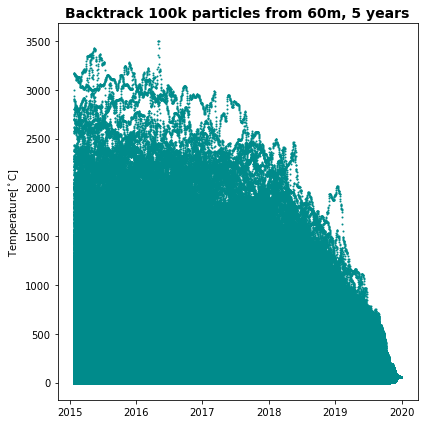

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

# for i in range(1000
plt.scatter(sim_60['time'][1:, :], sim_60['z'][1:, :], s=1, color='darkcyan');

ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 60m, 5 years',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
plt.tight_layout()


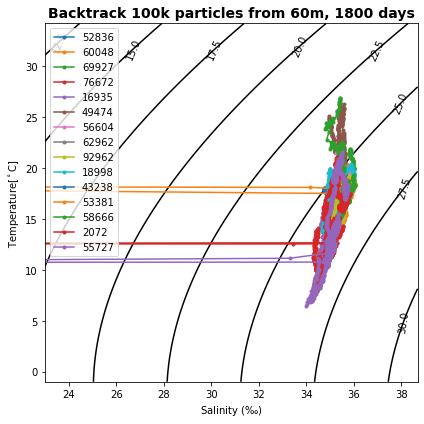

In [6]:
max_sal, min_sal = sim_60['abs_salinity'].max(), 24
max_temp, min_temp = sim_60['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(6,6))

rand_traj = np.random.choice(100000, 15)
for i in rand_traj:
    traj = sim_60['abs_salinity'][i,1:]
    i_sal = sim_60['abs_salinity'][i,1:][~np.isnan(traj)]
    i_temp = sim_60['cons_temperature'][i,1:][~np.isnan(traj)]
    plt.plot(i_sal, i_temp, '.-', label=i);
    
cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 60m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(min_sal - 1, max_sal + 1)
plt.tight_layout()
plt.legend()

# simulation 5000 m

In [9]:
sim_5000 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t3650_diff-False.nc')

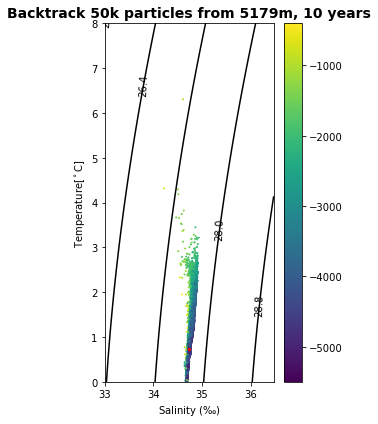

In [19]:
max_sal, min_sal = sim_5000['abs_salinity'].max(), 32
max_temp, min_temp = sim_5000['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

# for i in range(1000
im = plt.scatter(sim_5000['abs_salinity'][:, 0], sim_5000['cons_temperature'][:, 0], s=1, c=-sim_5000['z'][:,0]);
im = plt.scatter(sim_5000['abs_salinity'][:, -1], sim_5000['cons_temperature'][:, -1], s=1, c=-sim_5000['z'][:,-1]);
plt.scatter(sim_5000['abs_salinity'][0,1], sim_5000['cons_temperature'][0, 1], s=5, color='red')

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 50k particles from 5179m, 10 years',fontsize=14, fontweight='bold')

plt.colorbar(im)
ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
ax.set_ylim(0, 8)
plt.tight_layout()

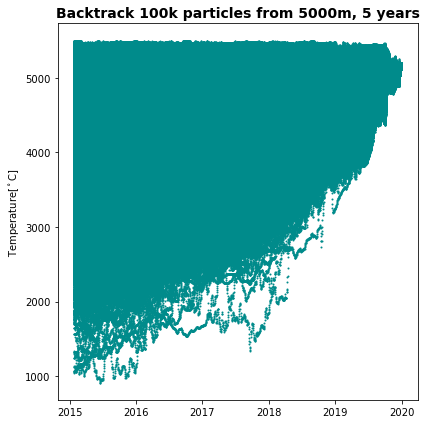

In [9]:
fig, ax = plt.subplots(figsize=(6,6))

# for i in range(1000
plt.scatter(sim_5000['time'][1:, :], sim_5000['z'][1:, :], s=1, color='darkcyan');

ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 5000m, 5 years',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
plt.tight_layout()


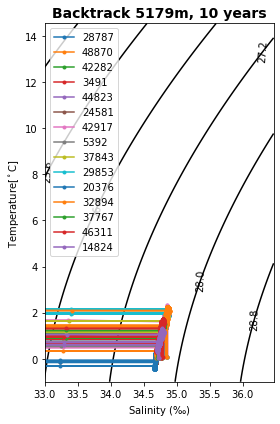

In [20]:
max_sal, min_sal = sim_5000['abs_salinity'].max(), 32
max_temp, min_temp = sim_5000['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

rand_traj = np.random.choice(50000, 15)
for i in rand_traj:
    traj = sim_5000['abs_salinity'][i,1:]
    i_sal = sim_5000['abs_salinity'][i,1:][~np.isnan(traj)]
    i_temp = sim_5000['cons_temperature'][i,1:][~np.isnan(traj)]
    plt.plot(i_sal, i_temp, '.-', label=i);

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 5179m, 10 years',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
plt.tight_layout()
plt.legend(loc = 'upper left')

# finding false salinties

In [5]:
diff = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t10_no_v_s_frag.nc')

In [6]:
diff

<xarray.Dataset>
Dimensions:           (traj: 50, obs: 11)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 49.0 49.0 49.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2019...
    lat               (traj, obs) float64 -32.17 -32.15 -32.1 ... -31.83 -31.82
    lon               (traj, obs) float64 6.279 6.346 6.383 ... 6.428 6.52 6.587
    z                 (traj, obs) float64 5.179e+03 5.188e+03 ... 5.124e+03
    cons_temperature  (traj, obs) float32 0.7186 0.7165 0.7192 ... 0.7145 0.7177
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... 34.74 34.74
    mld               (traj, obs) float32 30.64 46.48 48.47 ... 31.2 33.89 45.7
    radius            (traj, obs) float32 5e-08 5e-08 5e-08 ... 5e-08 5e-08
    volume            (traj, obs) float32 5.236e-22 5.236e-22 ... 5.236e-22
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... 1.028e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 ... 0.0 1.865e-09
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

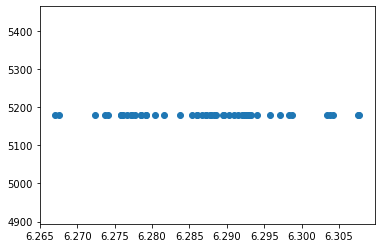

In [21]:
plt.scatter(diff['lon'][:,0], diff['z'][:,0]);

In [8]:
a = sim_5000['time'][0].where(sim_5000['abs_salinity'][0]<1).values

NameError: name 'sim_5000' is not defined

In [12]:
sum(sim_5000['abs_salinity']<1)

<xarray.DataArray 'abs_salinity' (obs: 3651)>
array([   0,    0,    0, ..., 9488, 9489, 9490])
Dimensions without coordinates: obs

In [8]:
a[~np.isnan(a)].shape

(0,)

In [42]:
s_a = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_S_2011-09-26.nc')

In [41]:
s_a['vosaline'].max()

<xarray.DataArray 'vosaline' ()>
array(42.66657639)
Coordinates:
    time_counter  datetime64[ns] 2011-09-28T12:00:00

In [65]:
sim_= np.load('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/out-UXPEYKZI/0/788.npy', allow_pickle=True).item()

In [66]:
sim_['lon']

array([41.04288449, -0.54696722, 50.22638412, ..., -2.25546657,
       15.98370025, -2.2078699 ])

In [67]:
sim_.keys()

dict_keys(['lon', 'lat', 'depth', 'time', 'id', 'cons_temperature', 'abs_salinity', 'mld', 'alpha', 'density', 'v_s'])

In [68]:
sim_['time']

array([3.58128e+08, 3.58128e+08, 3.58128e+08, ..., 3.58128e+08,
       3.58128e+08, 3.58128e+08])

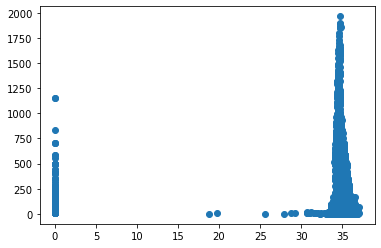

In [69]:
plt.scatter(sim_['abs_salinity'], sim_['depth'])

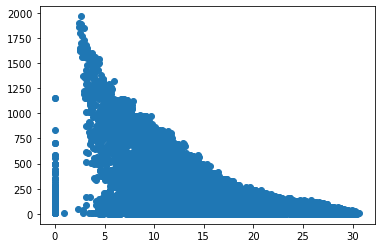

In [70]:
plt.scatter(sim_['cons_temperature'], sim_['depth'])

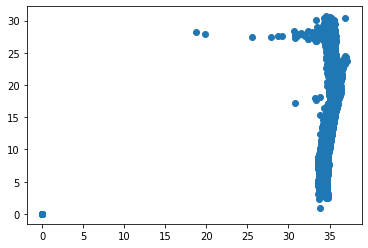

In [71]:
plt.scatter(sim_['abs_salinity'], sim_['cons_temperature'])

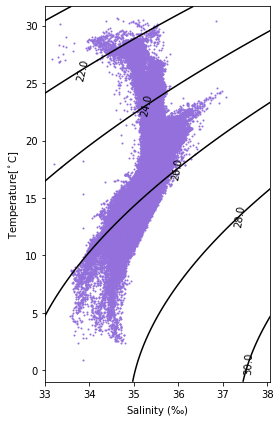

In [75]:
max_sal, min_sal = sim_['abs_salinity'].max(), 32
max_temp, min_temp = sim_['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

# for i in range(1000
plt.scatter(sim_['abs_salinity'], sim_['cons_temperature'], s=1, color='mediumpurple');

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
# ax.set_title('Backtrack 100k particles from 5179m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
plt.tight_layout()

No handles with labels found to put in legend.


/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


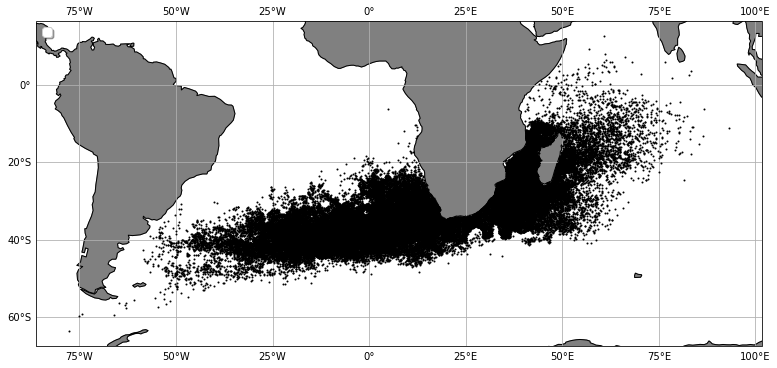

In [79]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-180, 180, -52, 25), crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, zorder=0, facecolor='#808080')
ax.coastlines(lw=1,resolution='110m')
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
# axi = fig.add_axes([0.92,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])

ax.scatter(sim_5000['lon'][:], 
           sim_['lat'][:],
           zorder=5, color='k', s=1)

ax.legend(loc='upper left', shadow=True, fontsize=12)

In [45]:
a = np.load('/storage/shared/oceanparcels/output_data/data_Claudio/out-SWTLVEYY/0/548.npy', allow_pickle=True).item()

In [46]:
a['depth'].shape

(100000,)

No handles with labels found to put in legend.


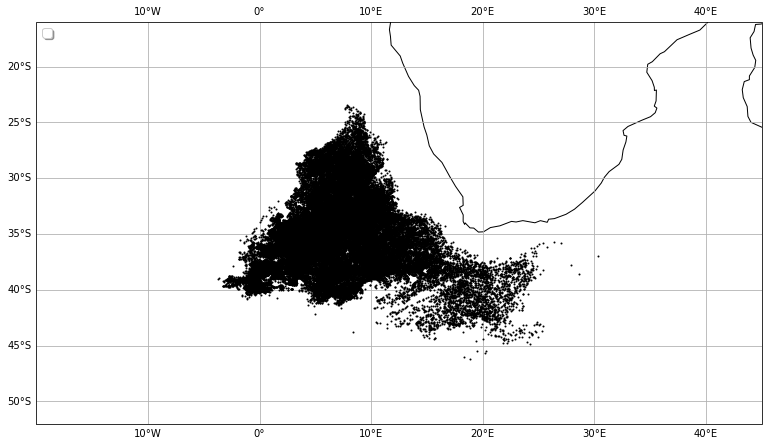

In [47]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-20, 45, -52, -16), crs=ccrs.PlateCarree())


ax.coastlines(lw=1,resolution='110m')
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
# axi = fig.add_axes([0.92,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])

ax.scatter(a['lon'], 
           a['lat'],
           zorder=5, color='k', s=1)

ax.legend(loc='upper left', shadow=True, fontsize=12)